# Handling trajectory data files (reading & writing)

<img align="right" src="https://anitagraser.github.io/movingpandas/assets/img/movingpandas.png">

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/anitagraser/movingpandas/master?filepath=tutorials/2-reading-data-from-files.ipynb)

**<p style="color:#e31883">This notebook demonstrates the current development version of MovingPandas.</p>**

For tutorials using the latest release visit https://github.com/anitagraser/movingpandas-examples.


In [1]:
import pandas as pd
from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString
import numpy as np

import sys
sys.path.append("..")
import movingpandas as mpd
mpd.show_versions()

from datetime import datetime

import warnings
warnings.simplefilter("ignore")


MovingPandas 0.16.0

SYSTEM INFO
-----------
python     : 3.8.10 (default, Jun 22 2022, 20:18:18)  [GCC 9.4.0]
executable : /usr/bin/python3
machine    : Linux-5.15.0-69-generic-x86_64-with-glibc2.29

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : None
GEOS lib   : None
GDAL       : 3.5.3
GDAL data dir: /usr/local/lib/python3.8/dist-packages/fiona/gdal_data
PROJ       : 9.2.0
PROJ data dir: /usr/local/lib/python3.8/dist-packages/pyproj/proj_dir/share/proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.13.0
pandas     : 1.5.3
fiona      : 1.9.3
numpy      : 1.24.1
shapely    : 2.0.1
rtree      : 1.0.1
pyproj     : 3.5.0
matplotlib : 3.6.3
mapclassify: None
geopy      : 2.3.0
holoviews  : 1.16.0
hvplot     : 0.8.3
geoviews   : 1.9.6
stonesoup  : None


## Reading CSVs

In [3]:
boats = ['wamv1', 'wamv2', 'wamv3', 'wamv4', 'wamv5']
wamvs = {}
count = 1

for boat in boats:
    df = pd.read_csv('data/bory_boat/' + boat + '_gps.csv' , delimiter=',')
    wamv = df[['field.longitude','field.latitude']]
    
    id = []
    for i in range(len(df['field.longitude'])):
        id.append(str(count))
    count +=1
    
    time_list = []
    for i in df['%time']:
        time_list.append(datetime.fromtimestamp(i/10**9).strftime("%A, %B %d, %Y %I:%M:%S"))
        
    wamv['trajectory_id'] = id
    wamvs[boat] = wamv
    wamv['time'] = time_list

In [4]:
wamvs['wamv1']

,field.longitude,field.latitude,trajectory_id,time
0,150.673586,-33.724223,1,"Thursday, January 01, 1970 08:14:14"
1,150.673586,-33.724223,1,"Thursday, January 01, 1970 08:14:14"
2,150.673586,-33.724223,1,"Thursday, January 01, 1970 08:14:14"
3,150.673586,-33.724223,1,"Thursday, January 01, 1970 08:14:14"
4,150.673586,-33.724223,1,"Thursday, January 01, 1970 08:14:14"
...,...,...,...,...
6929,150.672633,-33.724587,1,"Thursday, January 01, 1970 08:21:56"
6930,150.672633,-33.724587,1,"Thursday, January 01, 1970 08:21:56"
6931,150.672633,-33.724587,1,"Thursday, January 01, 1970 08:21:56"
6932,150.672633,-33.724587,1,"Thursday, January 01, 1970 08:21:56"


## Pandas

In [5]:
merge_df = pd.concat([wamvs['wamv1'], wamvs['wamv2'], wamvs['wamv3'], wamvs['wamv4'], wamvs['wamv5']], axis=0)

In [6]:
merge_df

,field.longitude,field.latitude,trajectory_id,time
0,150.673586,-33.724223,1,"Thursday, January 01, 1970 08:14:14"
1,150.673586,-33.724223,1,"Thursday, January 01, 1970 08:14:14"
2,150.673586,-33.724223,1,"Thursday, January 01, 1970 08:14:14"
3,150.673586,-33.724223,1,"Thursday, January 01, 1970 08:14:14"
4,150.673586,-33.724223,1,"Thursday, January 01, 1970 08:14:14"
...,...,...,...,...
6927,150.672736,-33.724567,5,"Thursday, January 01, 1970 08:21:56"
6928,150.672736,-33.724567,5,"Thursday, January 01, 1970 08:21:56"
6929,150.672736,-33.724567,5,"Thursday, January 01, 1970 08:21:56"
6930,150.672736,-33.724567,5,"Thursday, January 01, 1970 08:21:56"


## speed 

In [7]:
traj_collection = mpd.TrajectoryCollection(merge_df, 'trajectory_id',t='time', x='field.longitude', y='field.latitude')
traj_collection.add_speed()

In [8]:
traj_collection.get_max('speed')

0.8697229981099356

<AxesSubplot: >

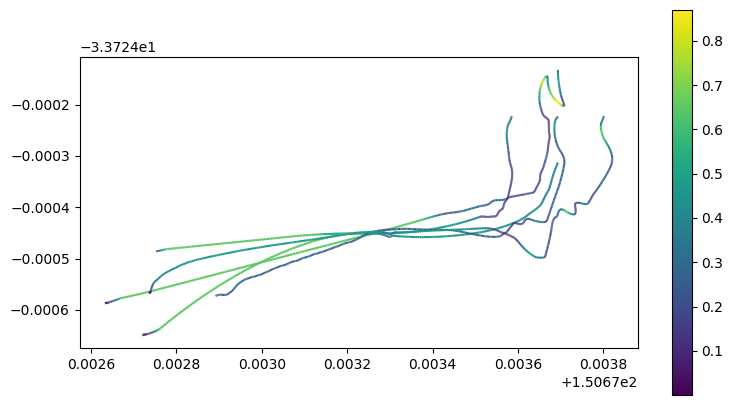

In [9]:
traj_collection.plot(column='speed', legend=True, figsize=(9,5))

## direction

In [10]:
traj_collection.add_direction()

<AxesSubplot: >

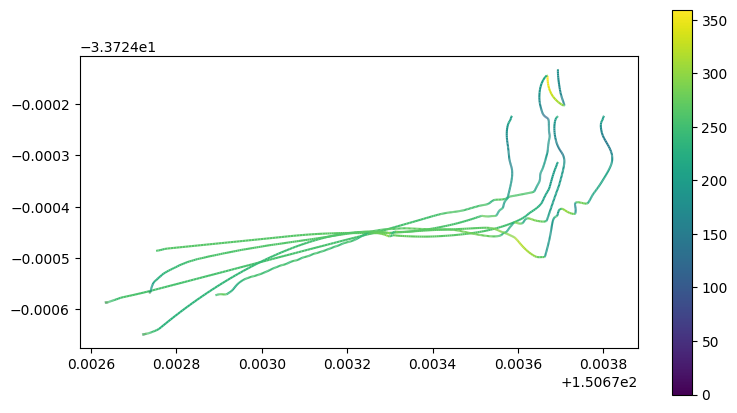

In [11]:
traj_collection.plot(column='direction', legend=True, figsize=(9,5))

## location

In [12]:
traj_collection.get_start_locations()

,trajectory_id,geometry,speed,direction
0,1,POINT (150.67359 -33.72422),0.060566,228.047399
1,2,POINT (150.67369 -33.72413),0.017647,321.448734
2,3,POINT (150.67369 -33.72431),0.052468,231.690377
3,4,POINT (150.67380 -33.72422),0.047897,233.48107
4,5,POINT (150.67369 -33.72422),0.067763,214.174728


In [13]:
traj_collection.get_end_locations()

,trajectory_id,geometry,speed,direction
0,1,POINT (150.67263 -33.72459),0.006231,252.092941
1,2,POINT (150.67275 -33.72449),0.229305,259.116324
2,3,POINT (150.67272 -33.72465),0.004083,252.371835
3,4,POINT (150.67289 -33.72457),0.219746,249.012848
4,5,POINT (150.67274 -33.72457),0.001011,332.823916


## segments between times

In [14]:
t1 = '01/01/70 08:14:14'
t2 = '01/01/70 08:16:14'
t1 = datetime.strptime(t1, '%m/%d/%y %H:%M:%S')
t2 = datetime.strptime(t2, '%m/%d/%y %H:%M:%S')

<AxesSubplot: >

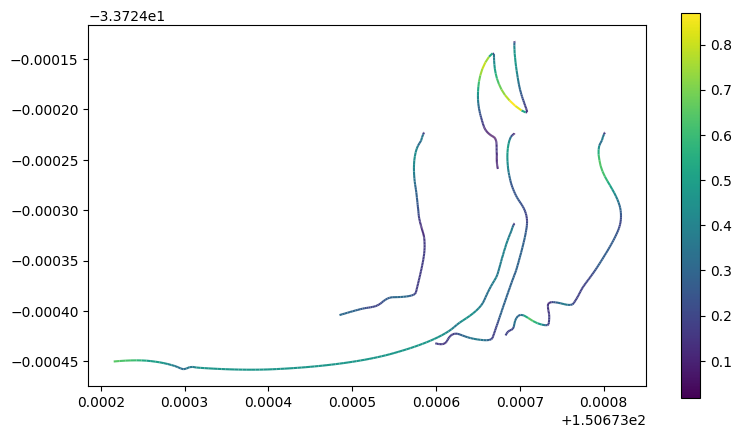

In [15]:
traj_collection.get_segments_between(t1, t2).plot(column='speed', legend=True, figsize=(9,5))